In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import K2fov
import numpy as np
%matplotlib inline
from tqdm import tqdm
import astropy.units as u
from datetime import datetime
from astropy.coordinates import SkyCoord
plt.style.use('ggplot')

In [6]:
print('Downloading K2 candidate planets from NEXSCI...')
NEXSCI_API = 'http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI'
k2 = pd.read_csv(NEXSCI_API + '?table=k2candidates&select=*'
                 '&where=k2c_disp+like+%27C%25%27')  # +and+k2c_recentflag=1
k2.to_csv('k2-candidate-planets.csv')
k2 = k2[k2.k2c_disp == 'CONFIRMED']

In [5]:
kepler = pd.read_csv(NEXSCI_API + '?table=cumulative&select=*'
                 '&where=koi_disposition+like+%27C%25%27') 
kepler.to_csv('kepler-candidate-planets.csv')
kepler = kepler[kepler.koi_disposition == 'CONFIRMED']

Text(0,0.5,'Frequency')

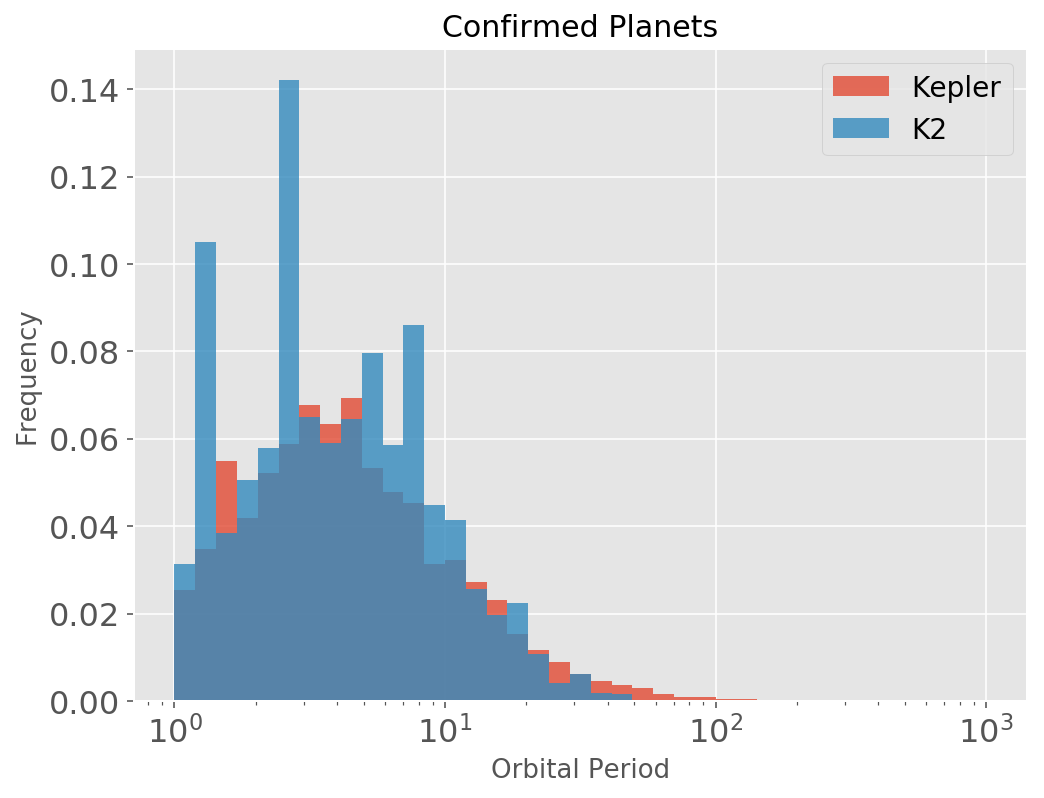

In [59]:
plt.figure(figsize=(8, 6))
h = plt.hist(kepler.koi_period, np.logspace(0, 3, 40), density=True, alpha=0.8, label='Kepler');
_ = plt.hist(k2.pl_orbper, h[1], density=True, alpha=0.8, label='K2');
plt.xscale('log')
plt.legend()
plt.xlabel('Orbital Period', fontsize=13)
plt.title('Confirmed Planets', fontsize=15)
plt.ylabel('Frequency', fontsize=13)

Text(0,0.5,'Frequency')

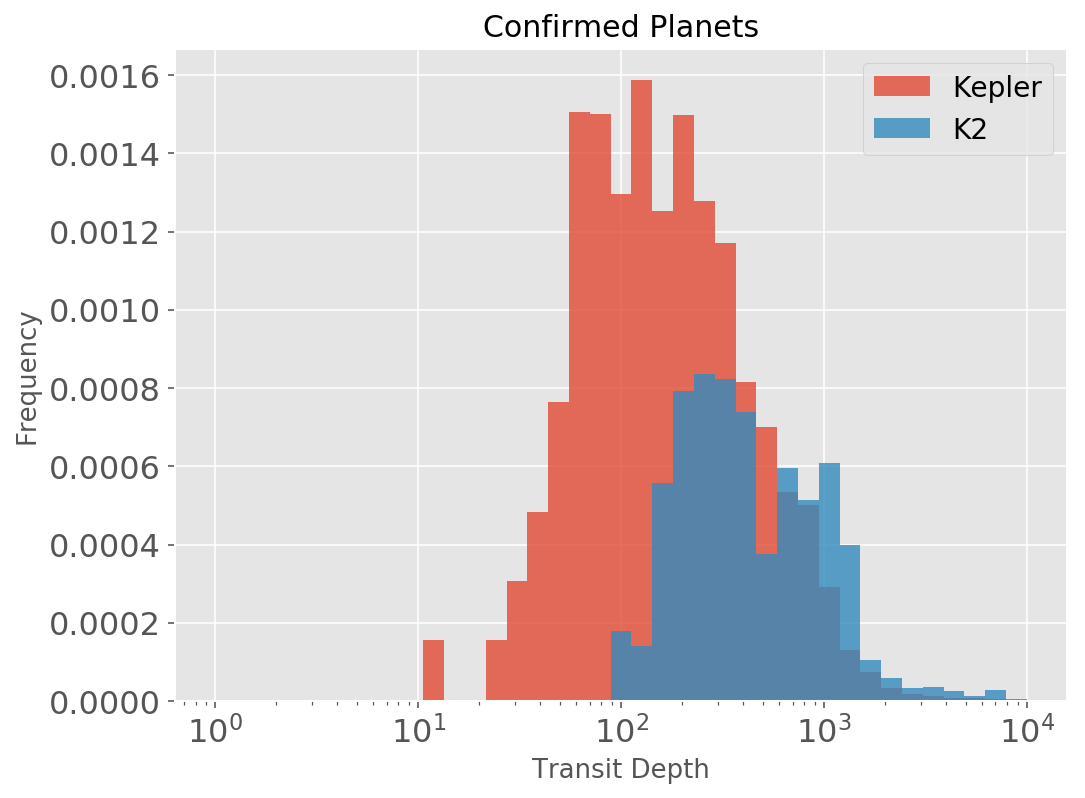

In [61]:
plt.figure(figsize=(8, 6))
h = plt.hist(kepler.koi_depth[np.isfinite(kepler.koi_depth)], np.logspace(0, 4, 40), density=True, alpha=0.8, label='Kepler');
_ = plt.hist(k2.pl_trandep[np.isfinite(k2.pl_trandep)]*1e4, h[1], density=True, alpha=0.8, label='K2');
plt.xscale('log')
plt.legend()
plt.xlabel('Transit Depth', fontsize=13)
plt.title('Confirmed Planets', fontsize=15)
plt.ylabel('Frequency', fontsize=13)